# 📥 Importation des données

In [354]:
import numpy as np              # Pour les vecteurs et les matrices
import matplotlib.pyplot as plt # Pour les graphiques
import pandas as pd
import sklearn as sk 
import re                       # Expression régulière

acousticness = 0
artists = 1
danceability = 2
duration_ms = 3
energy = 4
explicit = 5
identifier = 6
instrumentalness = 7
key = 8
liveness = 9
loudness = 10
mode = 11
name = 12
popularity = 13
release_date = 14
speechiness = 15
tempo = 16
valence = 17
year = 18

Data = pd.read_csv("data.csv", header=None)

n, p = Data.shape

Integer_Data = [Data[acousticness], Data[danceability], Data[duration_ms], Data[energy], Data[instrumentalness], Data[key], Data[liveness], Data[loudness], Data[mode], Data[popularity], Data[speechiness], Data[tempo], Data[valence], Data[year]]

Integer_Data = np.array(Integer_Data).T

p_2 = len(Integer_Data)

print(n, p_2)

169909 169909


| Numero | Nom | Type | Description |
| -- | --- | --- | --- |
| 0 | acousticness | réel | |
| 1 | artists | tableau de chaînes de caractères | |
| 2 | danceability | réel | |
| 3 | duration_ms | entier | |
| 4 | energy | réel | |
| 5 | explicit | booléen | |
| 6 | id | chaîne de caractères | |
| 7 | instrumentalness | réel | |
| 8 | key | entier | |
| 9 | liveness | réel | |
| 10 | loudness | réel | |
| 11 | mode | entier | |
| 12 | name | chaîne de caractères | |
| 13 | popularity | entier | |
| 14 | release_date | chaîne de caractères | |
| 15 | speechiness | réel | |
| 16 | tempo | réel | |
| 17 | valence | réel | |
| 18 | year | entier | |

# 📊 Représentations graphiques

## 🔤 Variables qualitatives

### 👨‍🎤 Artiste

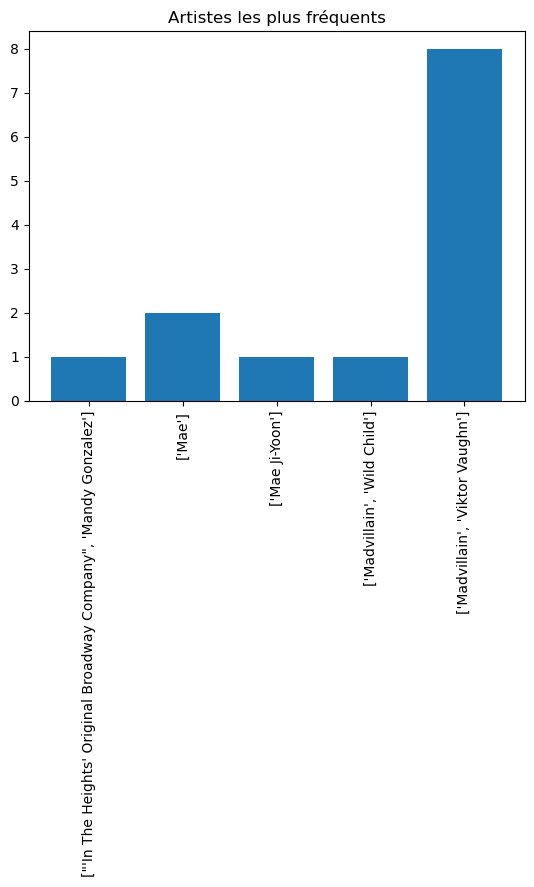

In [355]:
Artists_Modalites, Artistes_Frequence = np.unique(Data[artists], return_counts=True)

Artists_Modalites = Artistes_Modalites[Artistes_Frequence.argsort()]
Artists_Frequence = Artistes_Frequence[Artistes_Frequence.argsort()] / n

Artists_Modalites = Artistes_Modalites[::-1]
Artists_Frequence = Artistes_Frequence[::-1]

plt.bar(Artists_Modalites[:5], Artistes_Frequence[:5])
plt.title("Artistes les plus fréquents")
plt.xticks(rotation='vertical')
plt.show()


Il n'y a pas grand chose à déduire, cependant on peut remarquer que les artistes les plus représentés sont les artistes qui ont le plus de musiques dans le dataset. On peut aussi remarquer que les artistes les plus représentés sont des artistes qui ont commencé leur carrière dans les années 60-70.

## 🔢 Variables quantitatives

### Variables ponctuelles

#### 🕰️ Année

On ignore la variable `release_date` car elle est redondante avec la variable `year`. 

(100,)


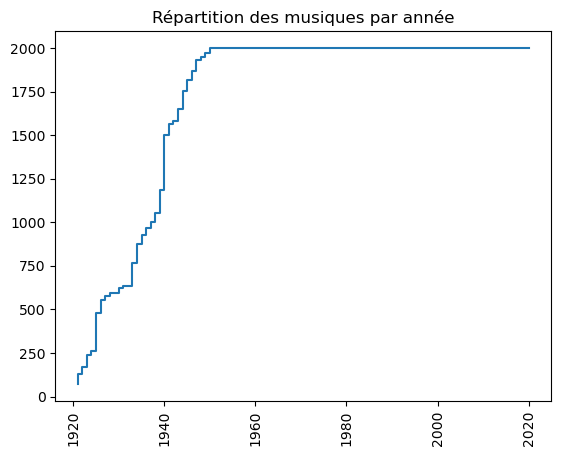

In [356]:
Release_Date_Year_Unique, Release_Date_Count = np.unique(Data[year], return_counts=True)

print(Release_Date_Year_Unique.shape)

plt.step(Release_Date_Year_Unique, Release_Date_Frequency)
plt.title("Répartition des musiques par année")
plt.xticks(rotation='vertical')
plt.show()


On constate que les années sont représentées de manière uniforme dans ce jeu de donné à partir de 1950 (2000 par années). Ce qui est logique afin d'avoir la représentation la plus objective possible. Le manque de musique avant 1950 est dû au fait que les musiques de cette époque ne sont pas assez représentées dans les plateformes de streaming (perte de données liée à la guerre ?).

#### 🅴 Explicite

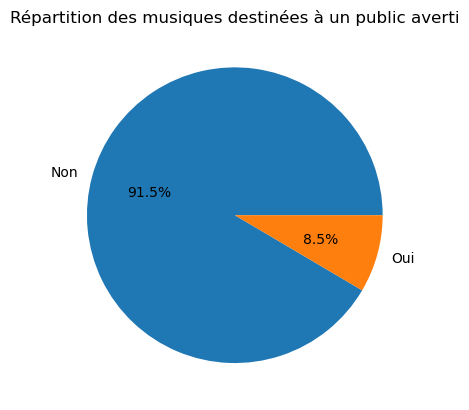

In [357]:
Explicit_Unique, Explicit_Count = np.unique(Data[explicit], return_counts=True)

Explicit_Count = Explicit_Count / n

plt.pie(Explicit_Count, labels=["Non", "Oui"], autopct='%1.1f%%')
plt.title("Répartition des musiques destinées à un public averti")
plt.show()

On remarque que la majorité des musiques ne sont pas explicites.

### 📈 Variables continues

-  `acousticness`
-  `danceability`
-  `duration_ms`
-  `energy`
-  `instrumentalness`
-  `liveness`
-  `loudness`
-  `speechiness`
-  `valence`

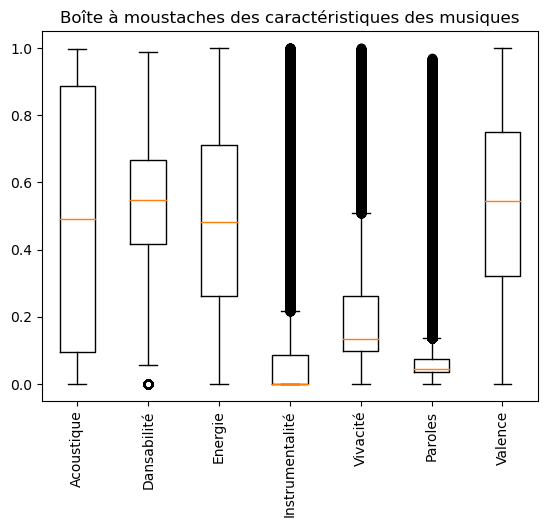

In [358]:
Boxplot_Data = [Data[acousticness], Data[danceability], Data[energy], Data[instrumentalness], Data[liveness], Data[speechiness], Data[valence]]

plt.boxplot(Boxplot_Data)

plt.title("Boîte à moustaches des caractéristiques des musiques")
plt.xticks([1, 2, 3, 4, 5, 6, 7], ["Acoustique", "Dansabilité", "Energie", "Instrumentalité", "Vivacité", "Paroles", "Valence"], rotation='vertical')

plt.show()

On se rend compte
Les bars noirs correspondent aux points (bcp trop)

# 🔬 Analyse

## Analyse en Composantes Principales

In [359]:
Mean = np.mean(Integer_Data, axis=0)

Standard_Deviation = np.std(Integer_Data, axis=0)

print(Mean.shape)
print(Standard_Deviation.shape)

(14,)
(14,)


(169909, 14)
(14,)
(14,)


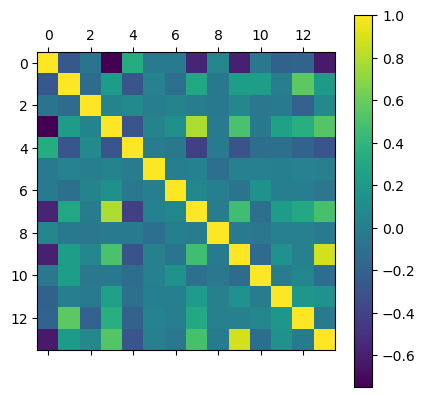

In [360]:
print(Integer_Data.shape)
print(Mean.shape)
print(Standard_Deviation.shape)

Data_Normalized = (Integer_Data - Mean) / Standard_Deviation

Data_Normalized.shape

Correlation_Matrix = (Data_Normalized.T @ Data_Normalized) / n

Eighenvalues, Eighenvectors = np.linalg.eigh(Correlation_Matrix)

plt.matshow(Correlation_Matrix)
plt.colorbar()
plt.show()

La matrice est bien symétriqu

## Complémentaire

Dans cette partie, nous allons essayer d'analyser d'autres variables qui ne sont pas directement concerné par notre sujet, mais qui peuvent apporter des informations complémentaires concernant

### Explicite et popularité

### Explicite et année

In [361]:

Explicit_Data = []

for Y in Release_Date_Unique_Year:
    Explicit_Data.append(Y, Data[year][:].count(0), Data[year][:].count(1))
    print(Y, Data[Y].count(0), Data[Y].count(1))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (32341018.py, line 4)